<a href="https://colab.research.google.com/github/upwind1993/Numerical-Analysis/blob/main/15%EC%9E%A5/%EC%98%88%EC%A0%9C15_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
X = np.matrix('6., 15., 55. ; 15., 55., 225. ; 55., 225., 979.')
const = np.matrix('152.6 ; 585.6 ; 2488.8')
b = np.linalg.solve(X,const)
np.set_printoptions(precision=4)
print('Estimated parameters are\n',b)


Estimated parameters are
 [[2.4786]
 [2.3593]
 [1.8607]]


예제

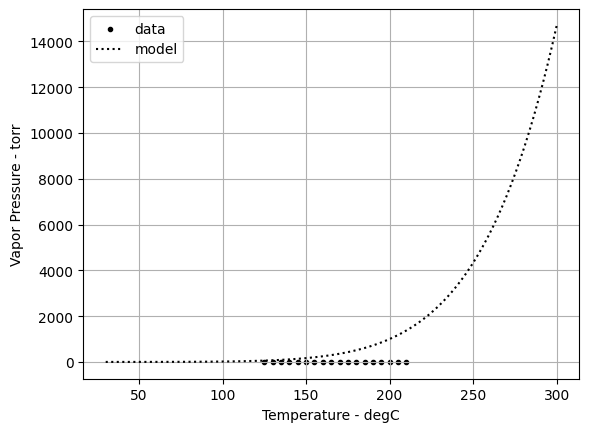

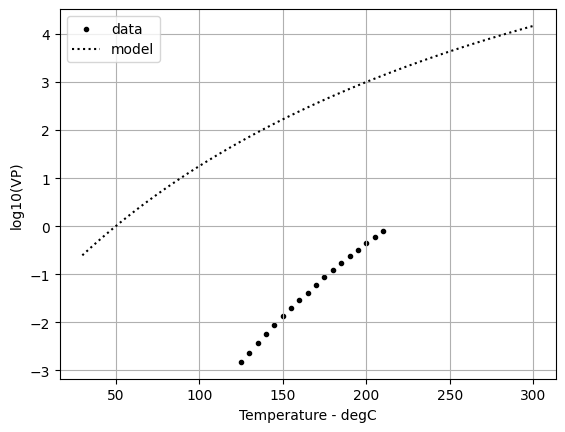

In [24]:
import numpy as np
import pylab
import pandas as pd


# read data from text file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/temp.csv')

# Extract the temperature and vapor pressure columns
T = data['Temperature (degC)'].values
VP = data['Vapor Pressure (torr)'].values
pylab.scatter(T,VP,c='k',marker='.',label='data')
pylab.grid()
pylab.xlabel('Temperature - degC')
pylab.ylabel('Vapor Pressure - torr')
# initial guess for parameters
A = 10
B = 3500
C = 300
# plot model curve
Tplot = np.linspace(30.,300.,100)
VPplot = 10**(A-B/(C+Tplot))
pylab.plot(Tplot,VPplot,c='k',ls=':',label='model')
pylab.legend()
# log-transform VP data and generate similar plot
logVP = np.log10(VP)
pylab.figure()
pylab.scatter(T,logVP,c='k',marker='.',label='data')
pylab.grid()
pylab.xlabel('Temperature - degC')
pylab.ylabel('log10(VP)')
logVPplot = np.log10(VPplot)
pylab.plot(Tplot,logVPplot,c='k',ls=':',label='model')
pylab.legend()


Python Code for Nonlinear Regression - 1


[  10. 3500.  300.]


Text(0.5, 1.0, 'Nonlinear Regression')

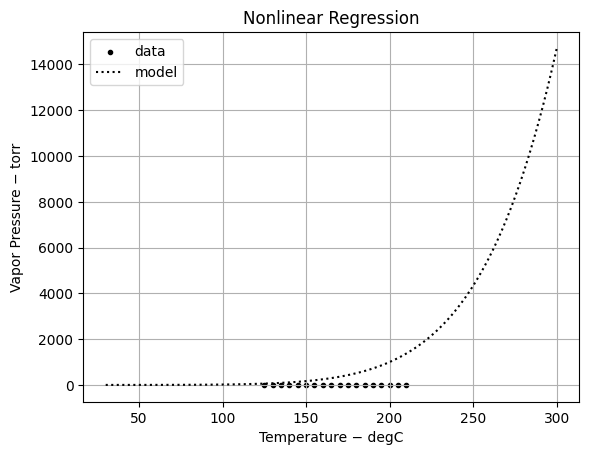

In [27]:
def SSE(params):
    A = params[0] ; B = params[1] ; C = params[2]
    logVPpred = A - B/(C+T)
    e = logVP - logVPpred
    return np.dot(e,e)
from scipy.optimize import minimize
result = minimize(SSE,(A,B,C))
print(result.x)
# plot data
pylab.figure()
pylab.scatter(T,VP,c='k',marker='.',label='data')
pylab.grid()
pylab.xlabel('Temperature − degC')
pylab.ylabel('Vapor Pressure − torr')
# regressed estimates for parameters
A = result.x[0]
B = result.x[1]
C = result.x[2]
# plot model curve
Tplot = np.linspace(30.,300.,100)
VPplot = 10**(A-B/(C+Tplot))
pylab.plot(Tplot,VPplot,c='k',ls=':',label='model')
pylab.legend()
pylab.title('Nonlinear Regression')

Python Code for Nonlinear Regression - 2

R−squared =  nan
Standard error of the estimate =  nan


Text(0.5, 1.0, 'Residuals vs. Fits')

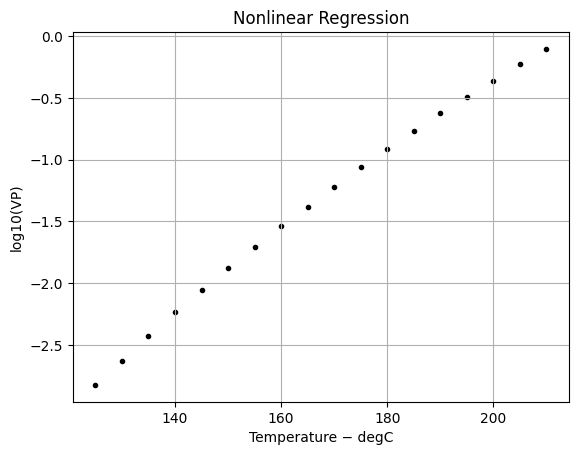

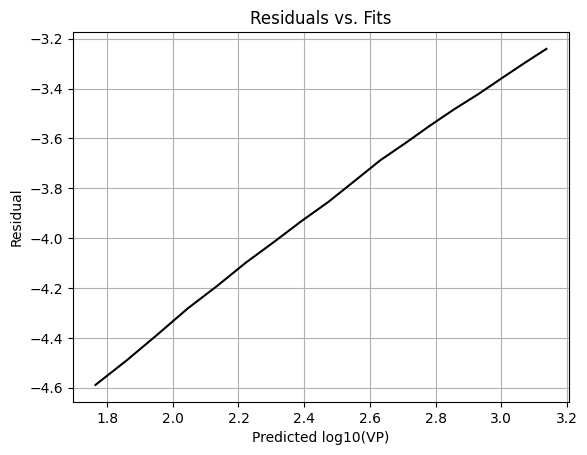

In [29]:
pylab.figure()
pylab.scatter(T,logVP,c='k',marker='.',label='data')
pylab.grid()
pylab.xlabel('Temperature − degC')
pylab.ylabel('log10(VP)')
pylab.title('Nonlinear Regression')
# regression statistics
SSe = SSE(result.x)
n = len(T)
SST = np.var(logVP)*(n-1)
R2 = 1 - SSe/SST
se = np.sqrt(SSe/(n-3))
print('R−squared = ',R2)
print('Standard error of the estimate = ',se)
logVPpred = A - B/(C+T)
e = logVP - logVPpred
pylab.figure()
pylab.plot(logVPpred,e,c='k')
pylab.grid()
pylab.xlabel('Predicted log10(VP)')
pylab.ylabel('Residual')
pylab.title('Residuals vs. Fits')

Estimating Parameter Uncertainty

In [30]:
# formulate the X matrix
X = np.zeros((n,3))
for i in range(n):
    X[i,0] = 1
    X[i,1] = 1/(C+T[i])
    X[i,2] = - B/(C+T[i])**2
# compute the covariance matrix
XtXinv = np.linalg.inv(np.dot(np.transpose(X),X))
cov = se**2 * XtXinv
seA = cov[0,0]
seB = cov[1,1]
seC = cov[2,2]
print('Estimated parameter standard errors:')
print('A: ',seA)
print('B: ',seB)
print('C: ',seC)

Estimated parameter standard errors:
A:  nan
B:  nan
C:  nan


In [31]:
# coefficients of variation
print('Coefficients of variation (%):')
print('A: {0:7.3g}'.format(seA/A*100))
print('B: {0:7.3g}'.format(seB/B*100))
print('C: {0:7.3g}'.format(seC/C*100))


Coefficients of variation (%):
A:     nan
B:     nan
C:     nan
